In [200]:
#https://www.kaggle.com/code/akshaychavan123/taxi-trip-time-prediction/notebook
#https://www.kaggle.com/code/mrganger/identifying-invalid-gps-points-in-taxi-trips tu jest spoko wykres ale trzeba bibioteki doinstalowac

import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import ast
import random as rn
import numpy as np


In [2]:
baza = pd.read_csv('taxi 400k.csv')

In [3]:
baza.head(4)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."


In [4]:
baza.describe()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP
count,4.000000e+05,82253.000000,198364.000000,4.000000e+05,4.000000e+05
mean,1.376474e+18,23486.085663,30.422607,2.000035e+07,1.376474e+09
std,2.286724e+15,19692.943272,17.825948,2.098117e+02,2.286724e+06
min,1.372637e+18,2001.000000,1.000000,2.000000e+07,1.372637e+09
25%,1.374427e+18,5444.000000,15.000000,2.000017e+07,1.374427e+09
50%,1.376425e+18,17217.000000,27.000000,2.000035e+07,1.376425e+09
75%,1.378560e+18,39654.000000,49.000000,2.000052e+07,1.378560e+09
max,1.380280e+18,63882.000000,63.000000,2.000098e+07,1.380280e+09


In [5]:
#usuwanie kolumn
baza.drop(['CALL_TYPE', 'ORIGIN_CALL','ORIGIN_STAND','TAXI_ID'], axis=1, inplace=True)

In [6]:
len(baza)

400000

In [7]:
def usun_wiersze_z_brakami(baza):
    baza.drop(baza[baza['MISSING_DATA'] == True].index, inplace=True)
    baza.reset_index(drop=True, inplace=True)

usun_wiersze_z_brakami(baza)  #usuwam wszystkie wiersze gdzie missing data jest true
baza.drop(['MISSING_DATA'], axis=1, inplace=True)

In [8]:
len(baza)

399997

In [9]:
baza.sort_values('TIMESTAMP',inplace = True)

In [10]:
baza.head()

,TRIP_ID,TIMESTAMP,DAY_TYPE,POLYLINE
577,1372636853620000380,1372636853,A,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8..."
3,1372636854620000520,1372636854,A,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
0,1372636858620000589,1372636858,A,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
10,1372636875620000233,1372636875,A,"[[-8.619894,41.148009],[-8.620164,41.14773],[-..."
64,1372636896620000360,1372636896,A,"[[-8.617599,41.146137],[-8.617581,41.14593],[-..."


In [11]:
#zamiana timestampa na bardzije przyjazny zapis
baza['year'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).year) 
baza['month'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).month) 
baza['month_day'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).day) 
baza['hour'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).hour) 
baza['week_day'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).weekday()) 

In [12]:
baza.head(5) #pierwsze 5 rekordów 


,TRIP_ID,TIMESTAMP,DAY_TYPE,POLYLINE,year,month,month_day,hour,week_day
577,1372636853620000380,1372636853,A,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8...",2013,7,1,2,0
3,1372636854620000520,1372636854,A,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013,7,1,2,0
0,1372636858620000589,1372636858,A,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013,7,1,2,0
10,1372636875620000233,1372636875,A,"[[-8.619894,41.148009],[-8.620164,41.14773],[-...",2013,7,1,2,0
64,1372636896620000360,1372636896,A,"[[-8.617599,41.146137],[-8.617581,41.14593],[-...",2013,7,1,2,0


In [13]:
puste_wiersze = baza[baza['POLYLINE'].isnull()]

# Wyświetl wybrane wiersze
print(puste_wiersze)

Empty DataFrame
Columns: [TRIP_ID, TIMESTAMP, DAY_TYPE, POLYLINE, year, month, month_day, hour, week_day]
Index: []


In [14]:
baza[-5:] # ostatnie 5 rekordów

,TRIP_ID,TIMESTAMP,DAY_TYPE,POLYLINE,year,month,month_day,hour,week_day
399986,1380278569620000260,1380278569,A,"[[-8.606331,41.144661],[-8.60688,41.144895],[-...",2013,9,27,12,4
399950,1380278662620000249,1380278662,A,"[[-8.640126,41.159718],[-8.64054,41.15979],[-8...",2013,9,27,12,4
399960,1380278748620000304,1380278748,A,"[[-8.613972,41.176368],[-8.613963,41.176386],[...",2013,9,27,12,4
399976,1380279405620000681,1380279405,A,"[[-8.690022,41.240403]]",2013,9,27,12,4
399991,1380279526620000681,1380279526,A,"[[-8.690112,41.240241],[-8.690175,41.240178],[...",2013,9,27,12,4


Text(0, 0.5, 'Dzień')

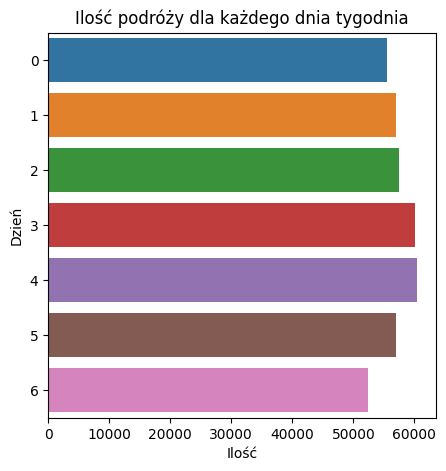

In [15]:
plt.figure(figsize = (5,5))
plt.title('Ilość podróży dla każdego dnia tygodnia')
sns.countplot(y = 'week_day', data = baza)
plt.xlabel('Ilość')
plt.ylabel('Dzień')

Text(0, 0.5, 'Miesiąc')

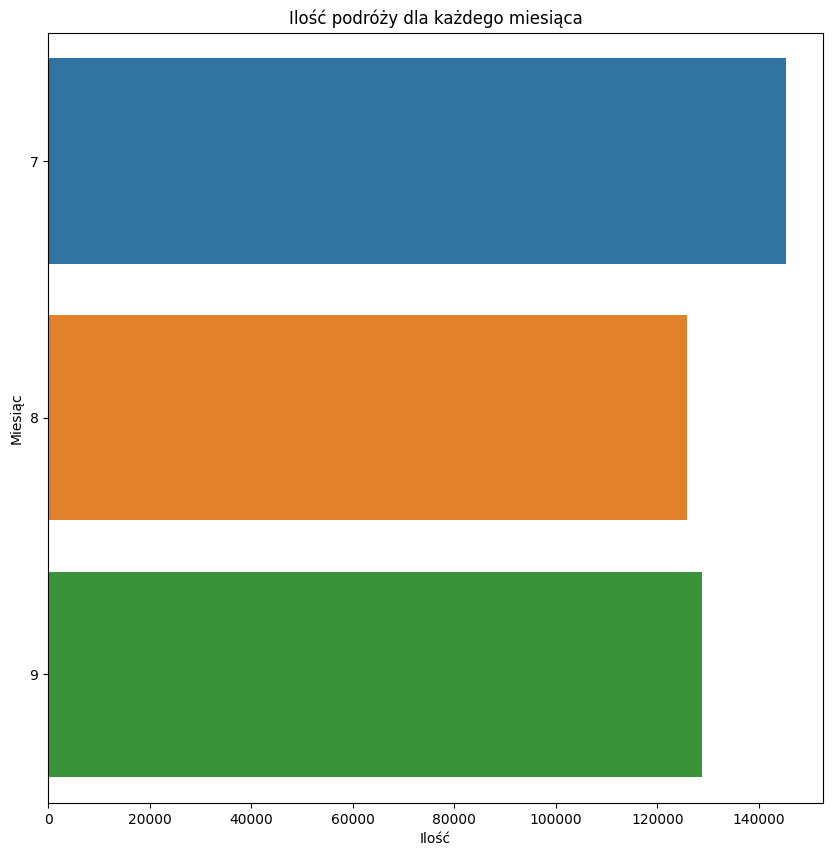

In [16]:
plt.figure(figsize = (10,10))
plt.title('Ilość podróży dla każdego miesiąca')
sns.countplot(y = 'month', data = baza)
plt.xlabel('Ilość')
plt.ylabel('Miesiąc')

Text(0, 0.5, 'Godzina')

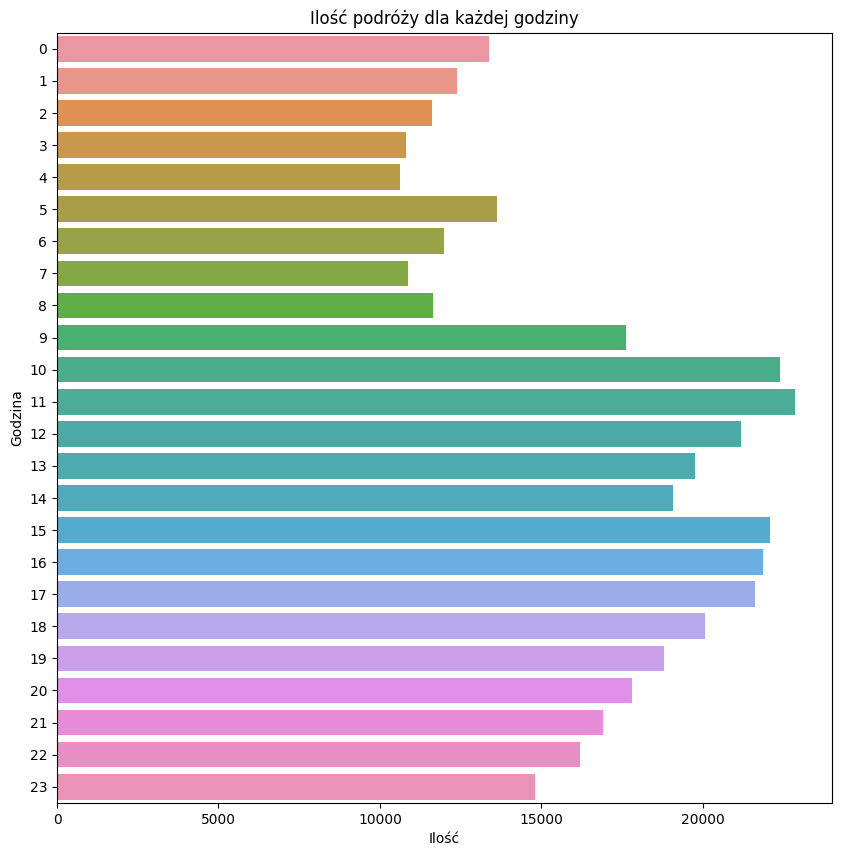

In [17]:
plt.figure(figsize = (10,10))
plt.title('Ilość podróży dla każdej godziny')
sns.countplot(y = 'hour', data = baza)
plt.xlabel('Ilość')
plt.ylabel('Godzina')

In [18]:
baza.shape

(399997, 9)

In [19]:
baza = baza.drop_duplicates()

In [20]:
baza.shape

(399996, 9)

In [21]:
#Saving the final dataframe for future use.
#baza.to_csv('Cleaned_data.csv', index = None)

In [72]:
new_df = baza[['POLYLINE']].copy()
new_df = new_df[:100000]

In [73]:



new_df['POLYLINE'] = new_df['POLYLINE'].apply(lambda x: ast.literal_eval(x)) #tutaj zamieniam polyline ze stringa na tablice
new_df['FIRST_ELEMENT'] = new_df['POLYLINE'].apply(lambda x: x[0] if len(x) > 0 else None) # wybieram pierwszy element
new_df['LAST_ELEMENT'] = new_df['POLYLINE'].apply(lambda x: x[-1] if len(x) > 0 else None) # wybieram ostatni element
new_df['TIME_IN_SEC'] = new_df['POLYLINE'].apply(lambda x: len(x)*15)
new_df = new_df.drop('POLYLINE', axis=1)
pd.set_option('display.max_colwidth', None)
new_df.head(3)



,FIRST_ELEMENT,LAST_ELEMENT,TIME_IN_SEC
577,"[-8.610291, 41.140746]","[-8.60589, 41.145345]",375
3,"[-8.574678, 41.151951]","[-8.607996, 41.142915]",645
0,"[-8.618643, 41.141412]","[-8.630838, 41.154489]",345


In [74]:
puste_wiersze = new_df[new_df['FIRST_ELEMENT'].isnull() | new_df['LAST_ELEMENT'].isnull()]
print(len(puste_wiersze))

371


In [75]:
new_df = new_df.dropna()
puste_wiersze = new_df[new_df['FIRST_ELEMENT'].isnull() | new_df['LAST_ELEMENT'].isnull()]
print(puste_wiersze)

Empty DataFrame
Columns: [FIRST_ELEMENT, LAST_ELEMENT, TIME_IN_SEC]
Index: []


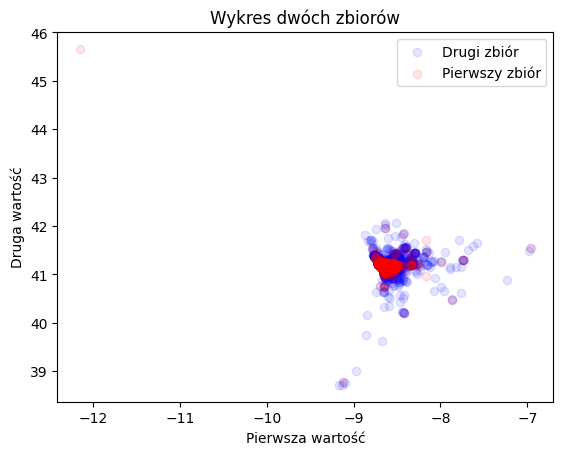

In [76]:
x = new_df['FIRST_ELEMENT'].apply(lambda x: x[0])
y = new_df['FIRST_ELEMENT'].apply(lambda x: x[1])

x2 = new_df['LAST_ELEMENT'].apply(lambda x: x[0])
y2 = new_df['LAST_ELEMENT'].apply(lambda x: x[1])

# Tworzenie wykresu
plt.scatter(x2, y2, c='blue',alpha=0.1, label='Drugi zbiór')
plt.scatter(x, y, c='red',alpha=0.1, label='Pierwszy zbiór')

plt.xlabel('Pierwsza wartość')
plt.ylabel('Druga wartość')
plt.title('Wykres dwóch zbiorów')
plt.legend()
plt.show()

In [ ]:
##KNN

In [201]:
from collections import Counter


def euclidean_distance(x1, x2):
    if (type(x1)==float):
        return np.sqrt(np.sum((float(x1)- float(x2))**2))
    else: 
        return 0
class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[1:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [202]:
class DataProcessing:
    @staticmethod
    def shuffle (x):
        for i in range(len(x)-1, 0,-1):
            j = rn.randint(0,i-1)
            x.iloc[i],x.iloc[j]=x.iloc[j],x.iloc[i]
    @staticmethod
    def normalization (x):
        values = x.select_dtypes(exclude="object") #usunie string bo string to obiekty zawsze
        columnNames=values.columns.tolist()
        for column in columnNames:
            data = x.loc[:,column] # wyciagamy cala kolumne wartosc
            min1 = min(data)
            max1 = max(data)
            for row in range(len(x)):
                xprim = (x.at[row,column]-min1)/(max1-min1)
                x.at[row,column]=xprim
    @staticmethod
    def split (x, k): # k = 0.7, czyli 70% treningowe reszta sprawdzajace, i zwraca dwa zbiory, trenujacy i walidujacy
        return x[: int(len(x)*k)], x[int(len(x)*k):]

In [203]:
new_df['FIRST_ELEMENT'] = new_df['FIRST_ELEMENT'].apply(np.float64)
new_df['LAST_ELEMENT'] = new_df['LAST_ELEMENT'].apply(np.float64)

#X = new_df[['FIRST_ELEMENT', 'LAST_ELEMENT']]
#y = new_df['TIME_IN_SEC']

In [205]:
X_train, X_test = DataProcessing.split(new_df[['FIRST_ELEMENT', 'LAST_ELEMENT']], 0.7)
y_train, y_test = DataProcessing.split(new_df['TIME_IN_SEC'], 0.7)



In [206]:
knn = KNN(k=3)
knn.fit(X_train, y_train)

# Przewidywanie etykiet dla zbioru testowego
y_pred = knn.predict(X_test)
print(y_pred)  # Wyświetlenie przewidywanych etykiet

[285 285]
